## Models BIC Score and BIC KL Divergence Comparison 

### Baseline KL Divergence BadCropCondition 

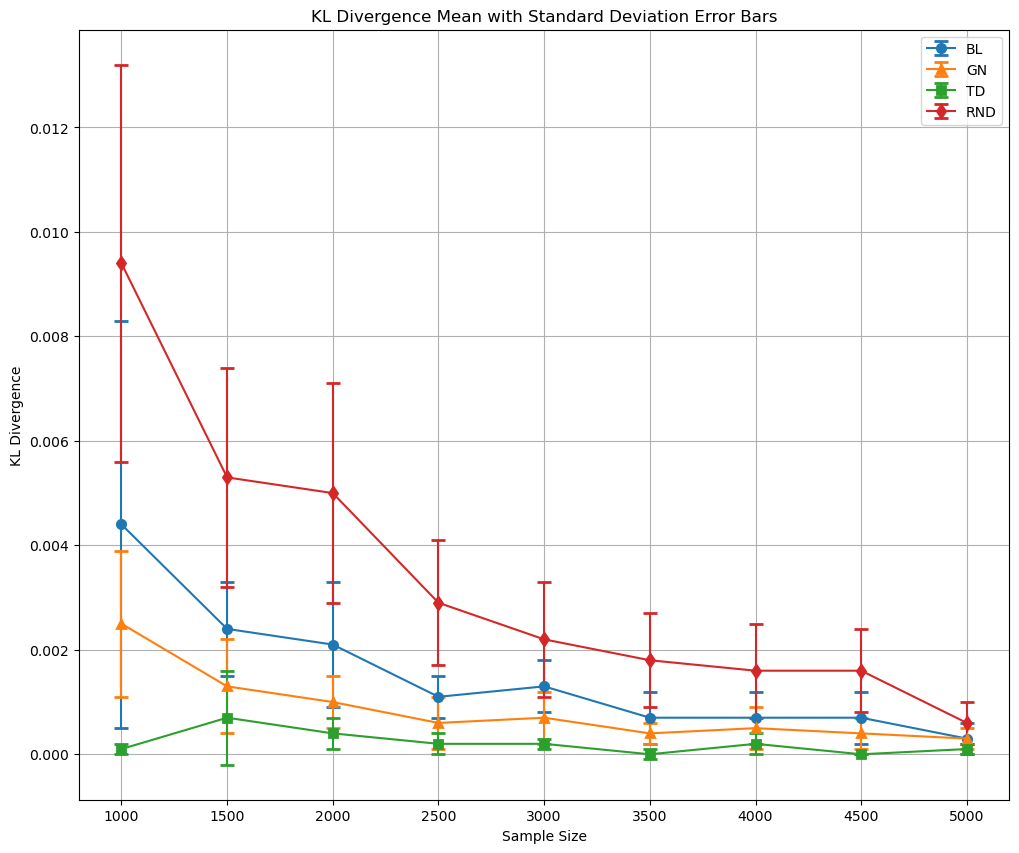

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the baseline dataset (BL)
data_bl = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0044, 0.0024, 0.0021, 0.0011, 0.0013, 0.0007, 0.0007, 0.0007, 0.0003],
    "stdvdev_kl_divergence": [0.0039, 0.0009, 0.0012, 0.0004, 0.0005, 0.0005, 0.0005, 0.0005, 0.0003],
    "dataset": "BL"
}
df_bl = pd.DataFrame(data_bl)

# Data for the second dataset (GN)
data_gn = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0025, 0.0013, 0.0010, 0.0006, 0.0007, 0.0004, 0.0005, 0.0004, 0.0003],
    "stdvdev_kl_divergence": [0.0014, 0.0009, 0.0005, 0.0005, 0.0005, 0.0002, 0.0004, 0.0003, 0.0002],
    "dataset": "GN"
}
df_gn = pd.DataFrame(data_gn)

# Data from the true distribution model (TD)
data_td = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0001, 0.0007, 0.0004, 0.0002, 0.0002, 0.0000, 0.0002, 0.0000, 0.0001],
    "stdvdev_kl_divergence": [0.0001, 0.0009, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0000, 0.0001],
    "dataset": "TD"
}
df_td = pd.DataFrame(data_td)

# Data from the random model (RND)
data_rnd = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0094, 0.0053, 0.0050, 0.0029, 0.0022, 0.0018, 0.0016, 0.0016, 0.0006],
    "stdvdev_kl_divergence": [0.0038, 0.0021, 0.0021, 0.0012, 0.0011, 0.0009, 0.0009, 0.0008, 0.0004],
    "dataset": "RND"
}
df_rnd = pd.DataFrame(data_rnd)

# Merging all datasets
df_all = pd.concat([df_bl, df_gn, df_td, df_rnd])

# Plotting
plt.figure(figsize=(12, 10))

# Define marker styles for each dataset for better visibility
markers = {'BL': 'o', 'GN': '^', 'TD': 's', 'RND': 'd'}

for dataset in df_all['dataset'].unique():
    df_subset = df_all[df_all['dataset'] == dataset]
    plt.errorbar(df_subset['sample_size'], df_subset['mean_kl_divergence'], 
                 yerr=df_subset['stdvdev_kl_divergence'], label=dataset, 
                 fmt=markers[dataset], capsize=5, linestyle='-', markeredgewidth=2)

plt.xlabel('Sample Size')
plt.ylabel('KL Divergence')
plt.title('KL Divergence Mean with Standard Deviation Error Bars')
plt.legend()
plt.grid(True)
plt.show()


### BIC Scores

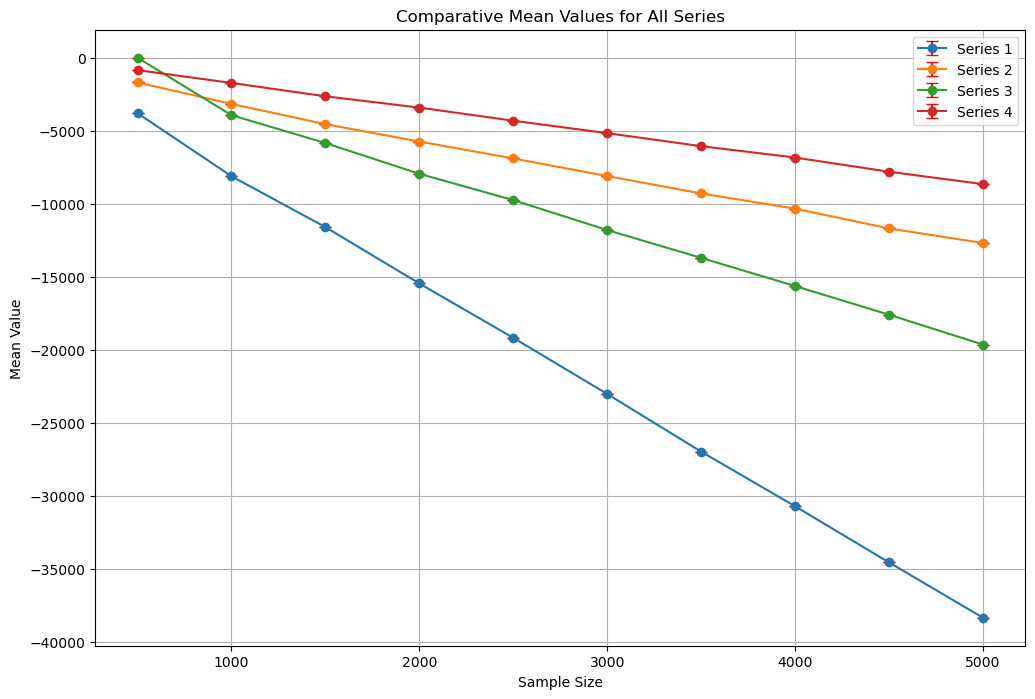

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

# The data for each series
data = {
    "Sample size": [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "Mean1": [-3798.0226, -8112.5578, -11596.5166, -15453.4469, -19174.2895, -23018.8987, -26966.2309, -30704.1325, -34549.9188, -38331.7205],
    "StdDev1": [0.0000]*10,
    "Mean2": [-1686.5140, -3164.1487, -4545.9620, -5737.0663, -6894.3436, -8100.8495, -9290.5231, -10331.5588, -11687.0487, -12682.8214],
    "StdDev2": [0.0000]*10,
    "Mean3": [-0.0107, -3932.4824, -5839.9927, -7945.2042, -9746.7931, -11796.7039, -13701.8399, -15629.1034, -17592.8567, -19635.4139],
    "StdDev3": [0.0044]+[0.0000]*9,
    "Mean4": [-848.8133, -1725.4863, -2640.9770, -3414.2126, -4311.4421, -5163.2694, -6054.7917, -6833.7801, -7804.3068, -8652.3383],
    "StdDev4": [0.0000]*6+[0.9095]+[0.0000]*3,
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)
df.set_index("Sample size", inplace=True)

# Plotting all means on the same plot for comparison
plt.figure(figsize=(12, 8))

for i, (mean, std) in enumerate(zip(df.columns[0::2], df.columns[1::2]), start=1):
    plt.errorbar(df.index, df[mean], yerr=df[std], label=f'Series {i}', capsize=4, ecolor='red', marker='o')

plt.title('Comparative Mean Values for All Series')
plt.xlabel('Sample Size')
plt.ylabel('Mean Value')
plt.grid(True)
plt.legend()
plt.show()


In [121]:
import pandas as pd

# Defining the true BIC distribution dataset 
data = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'td_mean_bic': [-3798.0226, -8112.5578, -11596.5166, -15453.4469, -19174.2895,
             -23018.8987, -26966.2309, -30704.1325, -34549.9188, -38331.7205],
    'td_stddev_bic': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
df


,sample_size,td_mean_bic,td_stddev_bic
0,500,-3798.0226,0.0
1,1000,-8112.5578,0.0
2,1500,-11596.5166,0.0
3,2000,-15453.4469,0.0
4,2500,-19174.2895,0.0
5,3000,-23018.8987,0.0
6,3500,-26966.2309,0.0
7,4000,-30704.1325,0.0
8,4500,-34549.9188,0.0
9,5000,-38331.7205,0.0


In [130]:
# Show the DataFrame
df

,Sample size,Mean,StdDev
0,500,-1686.514000,0.0
1,1000,-3164.148700,0.0
2,1500,-4545.962019,0.0
3,2000,-5737.066300,0.0
4,2500,-6894.343600,0.0
5,3000,-8100.849500,0.0
6,3500,-9290.523100,0.0
7,4000,-10331.558800,0.0
8,4500,-11687.048700,0.0
9,5000,-12682.821400,0.0


In [153]:
import pandas as pd

# True Distribution Data
data_td = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'td_mean_bic': [-3798.0226, -8112.5578, -11596.5166, -15453.4469, -19174.2895,
                    -23018.8987, -26966.2309, -30704.1325, -34549.9188, -38331.7205],
    'td_stddev_bic': [0.0000] * 10
}

# Baseline Data
data_bl = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'bl_mean_bic': [-1686.5140, -3164.1487, -4545.9620, -5737.0663, -6894.3436,
                    -8100.8495, -9290.5231, -10331.5588, -11687.0487, -12682.8214],
    'bl_stddev_bic': [0.0000] * 10
}

# Given Data
data_gn = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'gn_mean_bic': [-1962.0131, -3932.4824, -5839.9927, -7945.2042, -9746.7931,
                    -11796.7039, -13701.8399, -15629.1034, -17592.8567, -19635.4139],
    'gn_stddev_bic': [0.0] * 10
}

# Random Data
data_rnd = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'rnd_mean_bic': [-848.8133, -1725.4863, -2640.9770, -3414.2126, -4311.4421, -5163.2694,
                     -6054.7917, -6833.7801, -7804.3068, -8652.3383],
    'rnd_stddev_bic': [0.0, 0.0, 0.0, 0.0, 0.0, 0.9095, 0.0, 0.0, 0.0, 0.0]
}

# Convert each dataset to DataFrame
df_td = pd.DataFrame(data_td)
df_bl = pd.DataFrame(data_bl)
df_gn = pd.DataFrame(data_gn)
df_rnd = pd.DataFrame(data_rnd)

# Merge all DataFrames on 'sample_size'
df_merged = pd.merge(df_td, df_bl, on='sample_size')
df_merged = pd.merge(df_merged, df_gn, on='sample_size')
df_merged = pd.merge(df_merged, df_rnd, on='sample_size')

# Display the merged DataFrame
df_merged


,sample_size,td_mean_bic,td_stddev_bic,bl_mean_bic,bl_stddev_bic,gn_mean_bic,gn_stddev_bic,rnd_mean_bic,rnd_stddev_bic
0,500,-3798.0226,0.0,-1686.5140,0.0,-1962.0131,0.0,-848.8133,0.0000
1,1000,-8112.5578,0.0,-3164.1487,0.0,-3932.4824,0.0,-1725.4863,0.0000
2,1500,-11596.5166,0.0,-4545.9620,0.0,-5839.9927,0.0,-2640.9770,0.0000
3,2000,-15453.4469,0.0,-5737.0663,0.0,-7945.2042,0.0,-3414.2126,0.0000
4,2500,-19174.2895,0.0,-6894.3436,0.0,-9746.7931,0.0,-4311.4421,0.0000
5,3000,-23018.8987,0.0,-8100.8495,0.0,-11796.7039,0.0,-5163.2694,0.9095
6,3500,-26966.2309,0.0,-9290.5231,0.0,-13701.8399,0.0,-6054.7917,0.0000
7,4000,-30704.1325,0.0,-10331.5588,0.0,-15629.1034,0.0,-6833.7801,0.0000
8,4500,-34549.9188,0.0,-11687.0487,0.0,-17592.8567,0.0,-7804.3068,0.0000
9,5000,-38331.7205,0.0,-12682.8214,0.0,-19635.4139,0.0,-8652.3383,0.0000


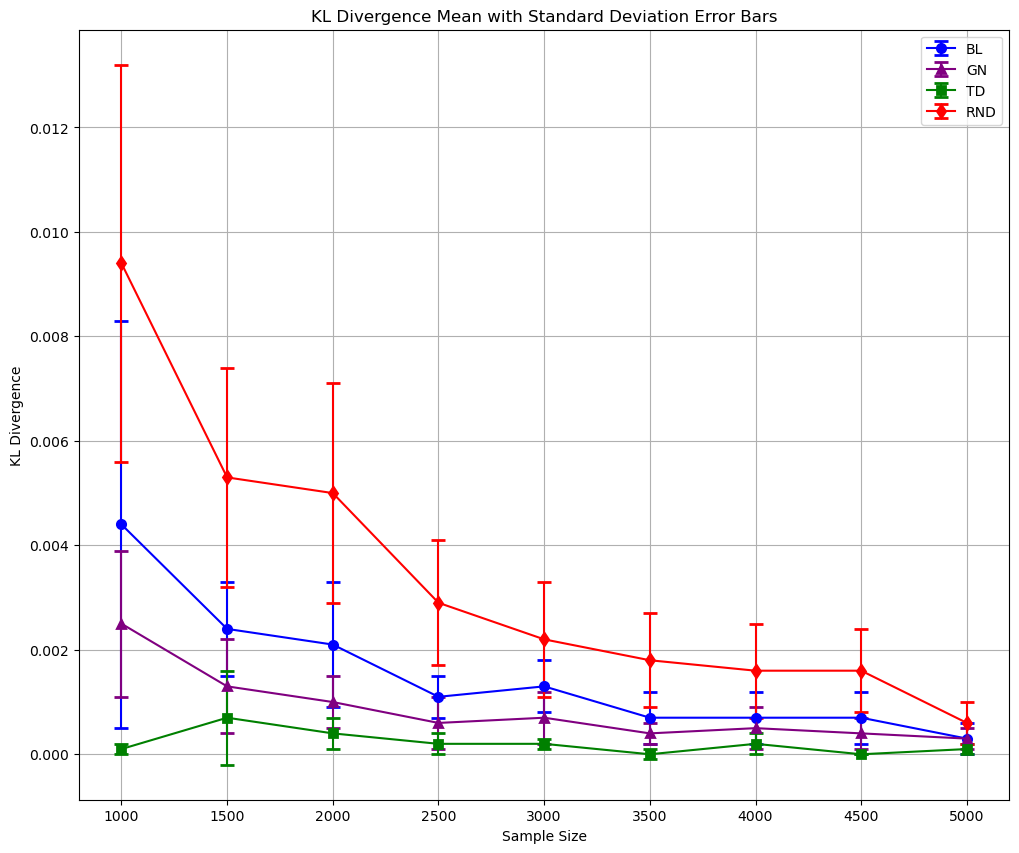

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the baseline dataset (BL)
data_bl = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0044, 0.0024, 0.0021, 0.0011, 0.0013, 0.0007, 0.0007, 0.0007, 0.0003],
    "stdvdev_kl_divergence": [0.0039, 0.0009, 0.0012, 0.0004, 0.0005, 0.0005, 0.0005, 0.0005, 0.0003],
    "dataset": "BL"
}
df_bl = pd.DataFrame(data_bl)

# Data for the second dataset (GN)
data_gn = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0025, 0.0013, 0.0010, 0.0006, 0.0007, 0.0004, 0.0005, 0.0004, 0.0003],
    "stdvdev_kl_divergence": [0.0014, 0.0009, 0.0005, 0.0005, 0.0005, 0.0002, 0.0004, 0.0003, 0.0002],
    "dataset": "GN"
}
df_gn = pd.DataFrame(data_gn)

# Data from the true distribution model (TD)
data_td = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0001, 0.0007, 0.0004, 0.0002, 0.0002, 0.0000, 0.0002, 0.0000, 0.0001],
    "stdvdev_kl_divergence": [0.0001, 0.0009, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0000, 0.0001],
    "dataset": "TD"
}
df_td = pd.DataFrame(data_td)

# Data from the random model (RND)
data_rnd = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0094, 0.0053, 0.0050, 0.0029, 0.0022, 0.0018, 0.0016, 0.0016, 0.0006],
    "stdvdev_kl_divergence": [0.0038, 0.0021, 0.0021, 0.0012, 0.0011, 0.0009, 0.0009, 0.0008, 0.0004],
    "dataset": "RND"
}
df_rnd = pd.DataFrame(data_rnd)

# Merging all datasets
df_all = pd.concat([df_bl, df_gn, df_td, df_rnd])

# Plotting
plt.figure(figsize=(12, 10))

# Define marker styles for each dataset for better visibility
markers = {'BL': 'o', 'GN': '^', 'TD': 's', 'RND': 'd'}
colors = {'BL': 'blue', 'GN': 'purple', 'TD': 'green', 'RND': 'red'}

for dataset in df_all['dataset'].unique():
    df_subset = df_all[df_all['dataset'] == dataset]
    plt.errorbar(df_subset['sample_size'], df_subset['mean_kl_divergence'], 
                 yerr=df_subset['stdvdev_kl_divergence'], label=dataset, 
                 fmt=markers[dataset], color=colors[dataset], capsize=5, linestyle='-', markeredgewidth=2)

plt.xlabel('Sample Size')
plt.ylabel('KL Divergence')
plt.title('KL Divergence Mean with Standard Deviation Error Bars')
plt.legend()
plt.grid(True)
plt.show()


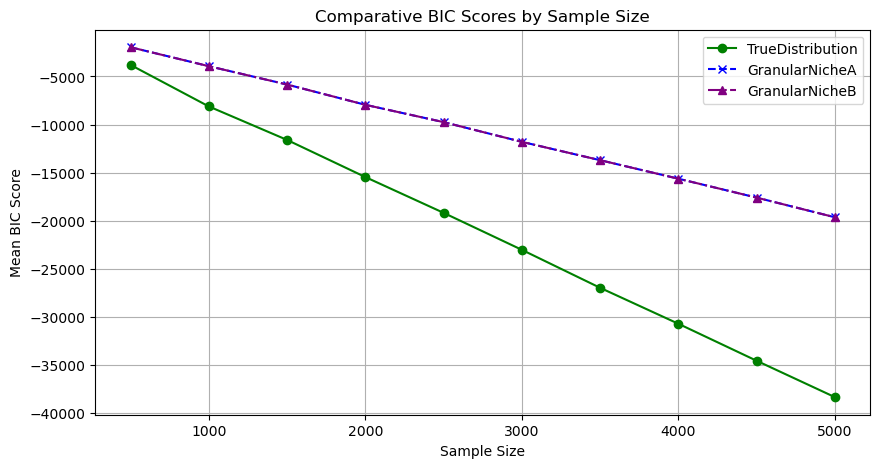

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for True Distribution, Baseline, Given Data, and Random Data
data_td = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'td_mean_bic': [-3798.0226, -8112.5578, -11596.5166, -15453.4469, -19174.2895,
                    -23018.8987, -26966.2309, -30704.1325, -34549.9188, -38331.7205],
    'td_stddev_bic': [0.0000] * 10
}

data_gna = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'gna_mean_bic': [-1962.0131, -3932.4824, -5839.9927, -7945.2042, -9746.7931,
                    -11796.7039, -13701.8399, -15629.1034, -17592.8567, -19635.4139],
    'gna_stddev_bic': [0.0] * 10
}
data_gnb = {
    'sample_size': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'gnb_mean_bic': [-1962.0131, -3932.4824, -5839.9927, -7945.2042, -9746.7931,
                    -11796.7039, -13701.8399, -15629.1034, -17592.8567, -19635.4139],
    'gnb_stddev_bic': [0.0] * 10
}

# Convert each dataset to a DataFrame
df_td = pd.DataFrame(data_td)
df_gna = pd.DataFrame(data_gna)
df_gnb = pd.DataFrame(data_gnb)

# Merge all DataFrames on 'sample_size'
df_merged = pd.merge(df_td, df_gna, on='sample_size')
df_merged = pd.merge(df_merged, df_gnb, on='sample_size')

# Plotting the comparative BIC scores
plt.figure(figsize=(10, 5))
plt.plot(df_merged['sample_size'], df_merged['td_mean_bic'], marker='o', linestyle='-', color='green', label='TrueDistribution')
plt.plot(df_merged['sample_size'], df_merged['gna_mean_bic'], marker='x', linestyle='--', color='blue', label='GranularNicheA')
plt.plot(df_merged['sample_size'], df_merged['gnb_mean_bic'], marker='^', linestyle='-.', color='purple', label='GranularNicheB')

plt.title('Comparative BIC Scores by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean BIC Score')
plt.grid(True)
plt.legend()
plt.show()

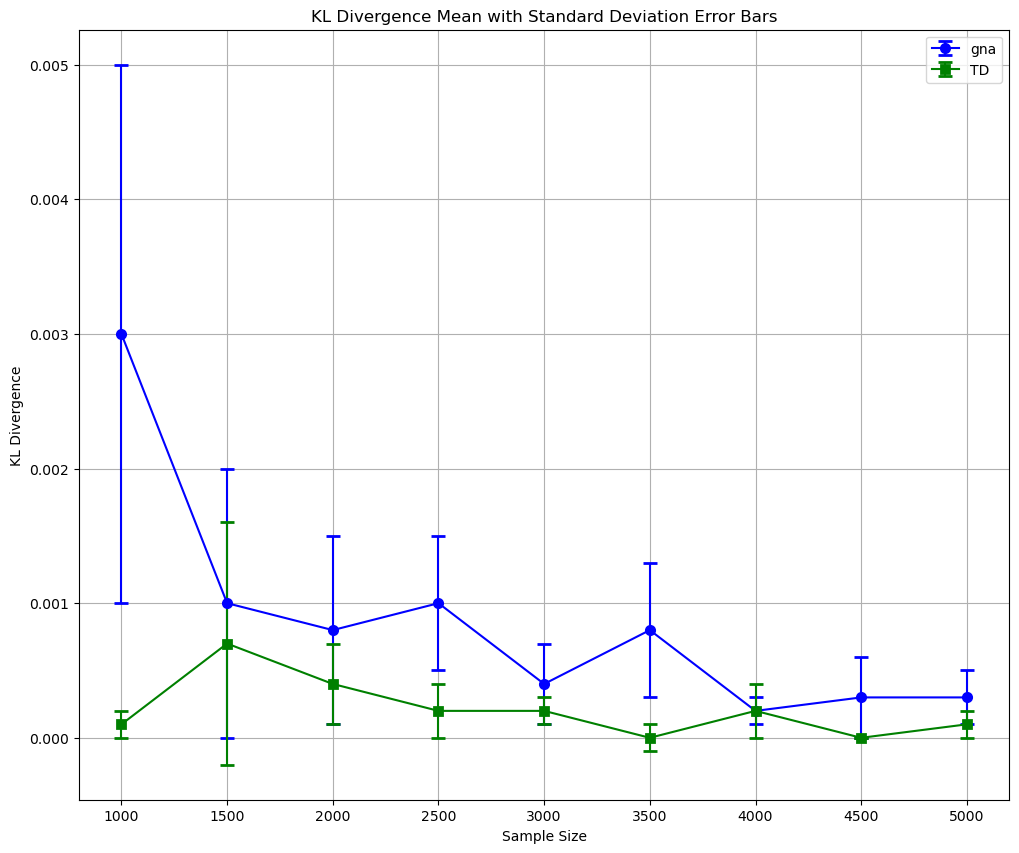

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Data for the second dataset (GN_A)
data_gna = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0030, 0.0010, 0.0008, 0.0010, 0.0004, 0.0008, 0.0002, 0.0003, 0.0003],
    "stdvdev_kl_divergence": [0.0020, 0.0010, 0.0007, 0.0005, 0.0003, 0.0005, 0.0001, 0.0003, 0.0002],
    "dataset": "gna"
}
df_gna = pd.DataFrame(data_gna)

# Data from the true distribution model (TD)
data_td = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0001, 0.0007, 0.0004, 0.0002, 0.0002, 0.0000, 0.0002, 0.0000, 0.0001],
    "stdvdev_kl_divergence": [0.0001, 0.0009, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0000, 0.0001],
    "dataset": "TD"
}
df_td = pd.DataFrame(data_td)


# Merging all datasets
df_all = pd.concat([df_gna, df_td])

# Plotting
plt.figure(figsize=(12, 10))

# Define marker styles for each dataset for better visibility
markers = {'gna': 'o', 'TD': 's'}
colors = {'gna': 'blue', 'TD': 'green'}

for dataset in df_all['dataset'].unique():
    df_subset = df_all[df_all['dataset'] == dataset]
    plt.errorbar(df_subset['sample_size'], df_subset['mean_kl_divergence'], 
                 yerr=df_subset['stdvdev_kl_divergence'], label=dataset, 
                 fmt=markers[dataset], color=colors[dataset], capsize=5, linestyle='-', markeredgewidth=2)

plt.xlabel('Sample Size')
plt.ylabel('KL Divergence')
plt.title('KL Divergence Mean with Standard Deviation Error Bars')
plt.legend()
plt.grid(True)
plt.show()


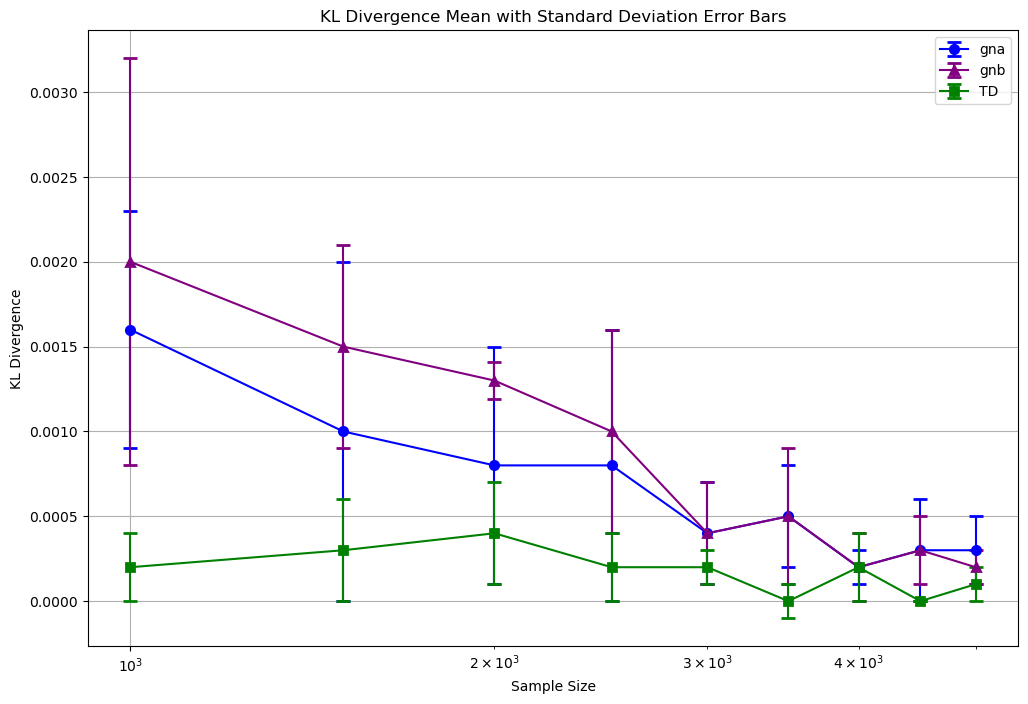

In [66]:
import pandas as pd
import matplotlib.pyplot as plt


# Data for the second dataset (GN_A)
data_gna = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0016, 0.0010, 0.0008, 0.0008, 0.0004, 0.0005, 0.0002, 0.0003, 0.0003],
    "stdvdev_kl_divergence": [0.0007, 0.0010, 0.0007, 0.0008, 0.0003, 0.0003, 0.0001, 0.0003, 0.0002],
    "dataset": "gna"
}
df_gna = pd.DataFrame(data_gna)

# Data for the second dataset (GN_B)
data_gnb = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0020, 0.0015, 0.0013, 0.0010, 0.0004, 0.0005, 0.0002, 0.0003, 0.0002],
    "stdvdev_kl_divergence": [0.0012, 0.0006, 0.00011, 0.0006, 0.0003, 0.0004, 0.0002, 0.0002, 0.0001],
    "dataset": "gnb"
}
df_gnb = pd.DataFrame(data_gnb)


# Data from the true distribution model (TD)
data_td = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0002, 0.0003, 0.0004, 0.0002, 0.0002, 0.0000, 0.0002, 0.0000, 0.0001],
    "stdvdev_kl_divergence": [0.0002, 0.0003, 0.0003, 0.0002, 0.0001, 0.0001, 0.0002, 0.0000, 0.0001],
    "dataset": "TD"
}
df_td = pd.DataFrame(data_td)


# Merging all datasets
df_all = pd.concat([df_gna, df_gnb, df_td])

# Plotting with box plots for all standard deviations
plt.figure(figsize=(12, 8))

# Define marker styles for each dataset for better visibility
markers = {'gna': 'o', 'gnb': '^', 'TD': 's'}
colors = {'gna': 'blue', 'gnb': 'purple', 'TD': 'green'}

for dataset in df_all['dataset'].unique():
    df_subset = df_all[df_all['dataset'] == dataset]
    plt.errorbar(df_subset['sample_size'], df_subset['mean_kl_divergence'], 
                 yerr=df_subset['stdvdev_kl_divergence'], label=dataset, 
                 fmt=markers[dataset], color=colors[dataset], capsize=5, linestyle='-', markeredgewidth=2)

plt.xlabel('Sample Size')
plt.ylabel('KL Divergence')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('KL Divergence Mean with Standard Deviation Error Bars')
plt.legend()
plt.grid(True)
plt.show()

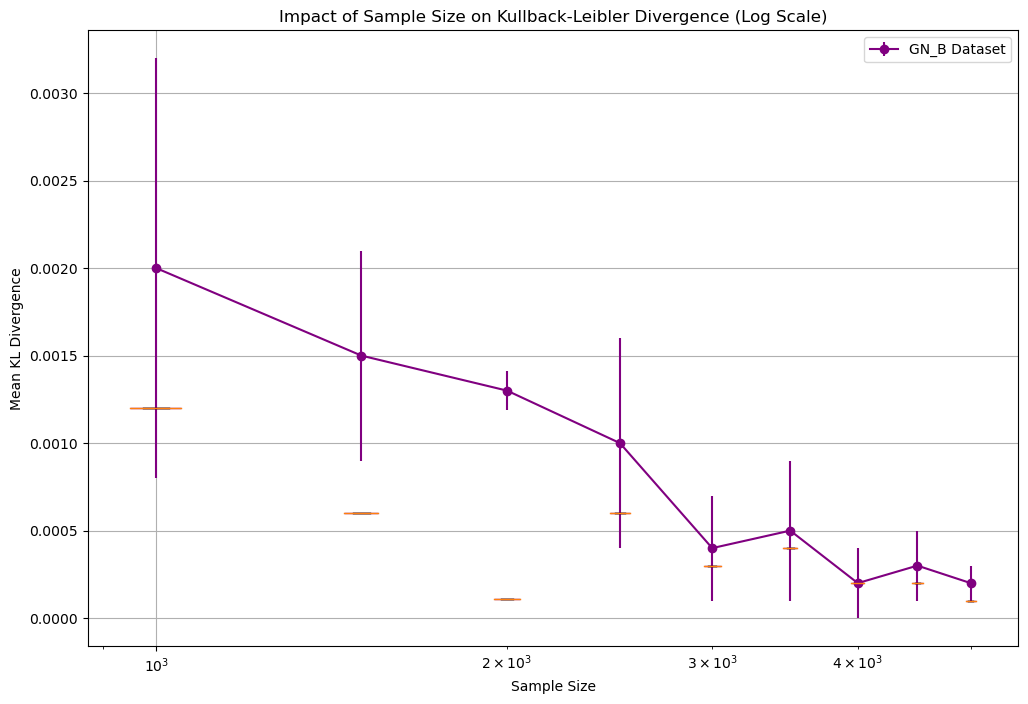

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the second dataset (GN_B)
data_gnb = {
    "sample_size": [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    "mean_kl_divergence": [0.0020, 0.0015, 0.0013, 0.0010, 0.0004, 0.0005, 0.0002, 0.0003, 0.0002],
    "stdvdev_kl_divergence": [0.0012, 0.0006, 0.00011, 0.0006, 0.0003, 0.0004, 0.0002, 0.0002, 0.0001],
    "dataset": "gnb"
}
df_gnb = pd.DataFrame(data_gnb)

# Plotting with box plots for all standard deviations
plt.figure(figsize=(12, 8))

# Plot mean KL divergence with error bars in purple
plt.errorbar(df_gnb["sample_size"], df_gnb["mean_kl_divergence"],
             yerr=df_gnb["stdvdev_kl_divergence"], fmt='o-', color='purple', label='GN_B Dataset')

# Plot box plots for all standard deviations in purple
for i, size in enumerate(df_gnb["sample_size"]):
    std_dev_values = [df_gnb["stdvdev_kl_divergence"].iloc[i]]
    plt.boxplot(std_dev_values, positions=[size], widths=100, showfliers=False, patch_artist=True, boxprops=dict(color='purple'))

plt.title('Impact of Sample Size on Kullback-Leibler Divergence (Log Scale)')
plt.xlabel('Sample Size')
plt.ylabel('Mean KL Divergence')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.legend()
plt.grid(True)
plt.show()
